In [19]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
X, y = make_classification(n_samples=100,n_features=2,n_informative=2,n_repeated=0,n_redundant=0,
                          n_clusters_per_class=1,class_sep=1.0,random_state=20)

In [6]:
df = pd.DataFrame(X)
sy = pd.Series(y)
df = pd.concat([df,sy],axis=1)

In [7]:
df.columns = ['x1','x2','label']

In [8]:
plt.style.use('seaborn')

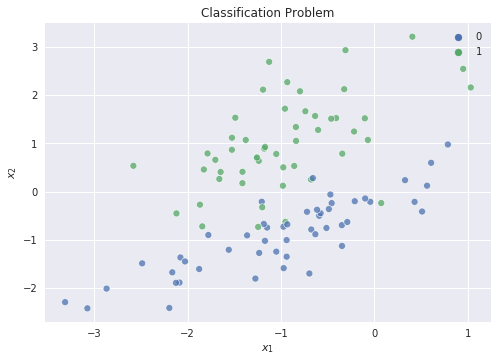

In [9]:
ax = sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,alpha=0.75)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('Classification Problem')
plt.savefig('../figures/class_problem.png',dpi=200)
plt.show()

In [10]:
from sklearn.svm import LinearSVC

In [16]:
l = LinearSVC()
l.fit(df[['x1','x2']],df['label'])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [29]:
l.intercept_

array([-0.70146087])

In [30]:
dec_x = np.linspace(-3,1,100)
dec_y = (-l.coef_[0][0] * dec_x - l.intercept_)/l.coef_[0][1]

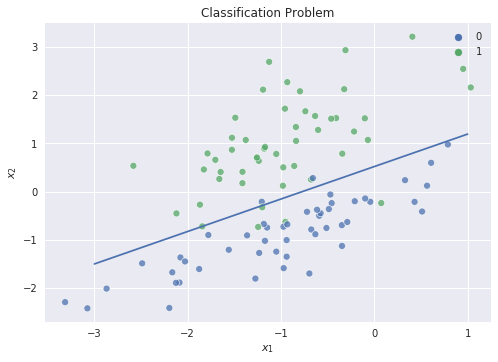

In [32]:
ax = sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,alpha=0.75)
ax.plot(dec_x,dec_y)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('Classification Problem')
plt.savefig('../figures/class_svm.png',dpi=200)
plt.show()

Calculate ROC

In [53]:
from sklearn.metrics import roc_curve, auc

In [54]:
dec_func = l.decision_function(df[['x1','x2']])
roc = roc_curve(df['label'],dec_func)


0.9772

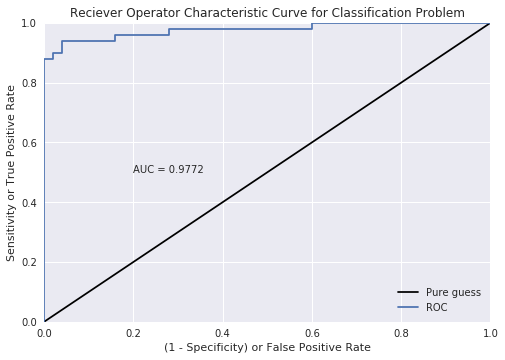

In [63]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1],'k', label='Pure guess')
ax.plot(roc[0],roc[1],label='ROC')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_title('Reciever Operator Characteristic Curve for Classification Problem')
ax.text(0.2,0.5,'AUC = {}'.format(auc(roc[0],roc[1])), transform=ax.transAxes)
ax.set_ylabel('Sensitivity or True Positive Rate')
ax.set_xlabel('(1 - Specificity) or False Positive Rate')
ax.legend()
plt.savefig('../figures/classification_ROC.png',dpi=200)
plt.show()